In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

complete_data = pd.read_csv("/content/StudentPerformanceFactors.csv")

# Project Check-in 2

**Non-Discrete Numeric Response Variable**
  - Exam_Score

**Predictor variables** (Chosen from EDA in check-in 1)
  - Hours_Studied
  - Attendance




In [ ]:
# First, take code from previous check-in to clean the data to have our get our updated data frame
# Although during this regression modeling, we will only use a subset of these rows, they are all included to create our training, validation, and test data sets\

main_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Parental_Involvement', 'Learning_Disabilities', 'Access_to_Resources', 'Distance_from_Home', 'Tutoring_Sessions', 'Exam_Score']
data = complete_data[main_features]
data = data.dropna(subset=['Distance_from_Home'])

# Next, divide the new dataframe into 3 different data sets using a 60:20:20 split
# We chose 60:20:20 as opposed to 80:10:10 or somwhere in between to decrease the liklihood of overfitting, since the metrics used are potentially subseptible to overfitting


train_and_validation_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

train_df, validation_df = train_test_split(train_and_validation_df, test_size=0.25, random_state=42)

train_df.to_csv('Student_Performance_train.csv', index=False)
validation_df.to_csv('Student_Performance_validation.csv', index=False)
test_df.to_csv('Student_Performance_test.csv', index=False)


# Regression Modeling & Evaluation

In [ ]:
# First, split up the training and validation sets into our X and Y data frames

x_train = train_df[["Hours_Studied", "Attendance"]]
y_train = train_df["Exam_Score"]

x_validation = validation_df[["Hours_Studied", "Attendance"]]
y_validation = validation_df["Exam_Score"]

# Create linear regression for each independent predictor
ls_fit_hours = LinearRegression()
ls_fit_hours.fit(x_train[["Hours_Studied"]], y_train)

ls_fit_attendance = LinearRegression()
ls_fit_attendance.fit(x_train[["Attendance"]], y_train)

# Plot LS on top of scatter plot of hours_studied vs exam score
fig = px.scatter(data, x='Hours_Studied', y='Exam_Score', title='Hours Studied vs Exam Score')
fig.add_trace(go.Scatter(x=x_train['Hours_Studied'], y=ls_fit_hours.intercept_ + train_df['Hours_Studied'] * ls_fit_hours.coef_[0], mode='lines', name='Least Squares Fit'))
fig.show()

# Plot LS on top of scatter plot of Attendance vs exam score
fig = px.scatter(data, x='Attendance', y='Exam_Score', title='Attendance vs Exam Score')
fig.add_trace(go.Scatter(x=x_train['Attendance'], y=ls_fit_attendance.intercept_ + train_df['Attendance'] * ls_fit_attendance.coef_[0], mode='lines', name='Least Squares Fit'))
fig.show()

# Create model for multiple linear regression using least squares difference

mls_fit = LinearRegression()
mls_fit.fit(x_train, y_train)

# Calculate metrics for training set on all 3 models
hours_train_mse = mean_squared_error(y_train, ls_fit_hours.predict(x_train[["Hours_Studied"]]))
attendance_train_mse = mean_squared_error(y_train, ls_fit_attendance.predict(x_train[["Attendance"]]))
mls_train_mse = mean_squared_error(y_train, mls_fit.predict(x_train))

hours_train_r2 = r2_score(y_train, ls_fit_hours.predict(x_train[["Hours_Studied"]]))
attendance_train_r2 = r2_score(y_train, ls_fit_attendance.predict(x_train[["Attendance"]]))
mls_train_r2 = r2_score(y_train, mls_fit.predict(x_train))

hours_train_correlation = np.corrcoef(y_train, ls_fit_hours.predict(x_train[["Hours_Studied"]]))[0, 1]
attendance_train_correlation = np.corrcoef(y_train, ls_fit_attendance.predict(x_train[["Attendance"]]))[0, 1]
mls_train_correlation = np.corrcoef(y_train, mls_fit.predict(x_train))[0, 1]

print(f"Hours MSE: {hours_train_mse}")
print(f"Attendance MSE: {attendance_train_mse}")
print(f"Multiple Linear MSE: {mls_train_mse}\n")
print(f"Hours R2: {hours_train_r2}")
print(f"Attendance R2: {attendance_train_r2}")
print(f"Multiple Linear R2: {mls_train_r2}\n")
print(f"Hours Correlation: {hours_train_correlation}")
print(f"Attendance Correlation: {attendance_train_correlation}")
print(f"Multiple Linear Correlation: {mls_train_correlation}")



Hours MSE: 12.489959637339545
Attendance MSE: 10.1863752702403
Multiple Linear MSE: 7.130350492920021

Hours R2: 0.1892357052200484
Attendance R2: 0.3387689310339925
Multiple Linear R2: 0.5371455347506965

Hours Correlation: 0.4350123046766012
Attendance Correlation: 0.5820385992646815
Multiple Linear Correlation: 0.7329021317684211


In [ ]:
# Evaluate metrics on validation set using training models

ls_fit_hours_val_mse = mean_squared_error(y_validation, ls_fit_hours.predict(x_validation[["Hours_Studied"]]))
ls_fit_attendance_val_mse = mean_squared_error(y_validation, ls_fit_attendance.predict(x_validation[["Attendance"]]))
mls_fit_val_mse = mean_squared_error(y_validation, mls_fit.predict(x_validation))

ls_fit_hours_val_r2 = r2_score(y_validation, ls_fit_hours.predict(x_validation[["Hours_Studied"]]))
ls_fit_attendance_val_r2 = r2_score(y_validation, ls_fit_attendance.predict(x_validation[["Attendance"]]))
mls_fit_val_r2 = r2_score(y_validation, mls_fit.predict(x_validation))

ls_fit_hours_val_correlation = np.corrcoef(y_validation, ls_fit_hours.predict(x_validation[["Hours_Studied"]]))[0, 1]
ls_fit_attendance_val_correlation = np.corrcoef(y_validation, ls_fit_attendance.predict(x_validation[["Attendance"]]))[0, 1]
mls_fit_val_correlation = np.corrcoef(y_validation, mls_fit.predict(x_validation))[0, 1]

print(f"Hours MSE: {ls_fit_hours_val_mse}")
print(f"Attendance MSE: {ls_fit_attendance_val_mse}")
print(f"Multiple Linear MSE: {mls_fit_val_mse}\n")
print(f"Hours R2: {ls_fit_hours_val_r2}")
print(f"Attendance R2: {ls_fit_attendance_val_r2}")
print(f"Multiple Linear R2: {mls_fit_val_r2}\n")
print(f"Hours Correlation: {ls_fit_hours_val_correlation}")
print(f"Attendance Correlation: {ls_fit_attendance_val_correlation}")
print(f"Multiple Linear Correlation: {mls_fit_val_correlation}")

Hours MSE: 11.259793379444265
Attendance MSE: 9.481154435783322
Multiple Linear MSE: 6.587955501190167

Hours R2: 0.21112573206309848
Attendance R2: 0.33573925269537863
Multiple Linear R2: 0.5384401473396503

Hours Correlation: 0.4596558521221392
Attendance Correlation: 0.580086543878091
Multiple Linear Correlation: 0.7354373741282756


# Overfitting / Underfitting


In [ ]:
k = 5
X = data[['Hours_Studied', 'Attendance']]
y = data['Exam_Score']

linear_model_hours = LinearRegression()
linear_model_attendance = LinearRegression()
multiple_linear_model = LinearRegression()

cv_scores_hours = cross_val_score(linear_model_hours, X[['Hours_Studied']], y, cv=k, scoring='r2')
print(f"Cross-validation R2 scores for Hours_Studied: {cv_scores_hours}")
print(f"Mean R2 score for Hours_Studied: {np.mean(cv_scores_hours)}\n")

cv_scores_attendance = cross_val_score(linear_model_attendance, X[['Attendance']], y, cv=k, scoring='r2')
print(f"Cross-validation R2 scores for Attendance: {cv_scores_attendance}")
print(f"Mean R2 score for Attendance: {np.mean(cv_scores_attendance)}\n")

cv_scores_multiple = cross_val_score(multiple_linear_model, X, y, cv=k, scoring='r2')
print(f"Cross-validation R2 scores for Multiple Linear Regression: {cv_scores_multiple}")
print(f"Mean R2 score for Multiple Linear Regression: {np.mean(cv_scores_multiple)}\n")

Cross-validation R2 scores for Hours_Studied: [0.18436839 0.20136707 0.17177798 0.19942307 0.23023061]
Mean R2 score for Hours_Studied: 0.1974334243594999

Cross-validation R2 scores for Attendance: [0.26711356 0.33935529 0.35060737 0.33242279 0.39558099]
Mean R2 score for Attendance: 0.33701599826898

Cross-validation R2 scores for Multiple Linear Regression: [0.46864951 0.5386978  0.52947152 0.54194356 0.62500579]
Mean R2 score for Multiple Linear Regression: 0.5407536357535772



Both of the R2 scores for Hours studied and Attendance are low, indicating underfitting. The R2 scores for multiple linear regression are better, but still not very good, so this could indicate low levels of underfitting. Also, the variance of the R2 scores is moderately low, so this reinforces that the model is slightly underfit. It makes sense for all 3 of these models to be underfit, because the high levels of bias are likely a result of only using 1 or 2 variables in our dataset. In the future of this project, we will use more variables which will increase the complexity of the model and could result in overfitting.

# Regularization


In [ ]:
alpha = .00001
X = data[['Hours_Studied', 'Attendance']]
y = data['Exam_Score']

ridge_model_hours = Ridge(alpha=alpha)
ridge_model_attendance = Ridge(alpha=alpha)
multiple_ridge_model = Ridge(alpha=alpha)
cv_scores_ridge_hours = cross_val_score(ridge_model_hours, X[['Hours_Studied']], y, cv=k, scoring='r2')
print(f"Cross-validation R2 scores for Hours_Studied with L2 Regularization: {cv_scores_ridge_hours}")
print(f"Mean R2 score for Hours_Studied with L2 Regularization: {np.mean(cv_scores_ridge_hours)}\n")

cv_scores_ridge_attendance = cross_val_score(ridge_model_attendance, X[['Attendance']], y, cv=k, scoring='r2')
print(f"Cross-validation R2 scores for Attendance with L2 Regularization: {cv_scores_ridge_attendance}")
print(f"Mean R2 score for Attendance with L2 Regularization: {np.mean(cv_scores_ridge_attendance)}\n")

cv_scores_ridge_multiple = cross_val_score(multiple_ridge_model, X, y, cv=k, scoring='r2')
print(f"Cross-validation R2 scores for Multiple Linear Regression with L2 Regularization: {cv_scores_ridge_multiple}")
print(f"Mean R2 score for Multiple Linear Regression with L2 Regularization: {np.mean(cv_scores_ridge_multiple)}\n")


Cross-validation R2 scores for Hours_Studied with L2 Regularization: [0.18436839 0.20136707 0.17177798 0.19942307 0.23023061]
Mean R2 score for Hours_Studied with L2 Regularization: 0.1974334243595018

Cross-validation R2 scores for Attendance with L2 Regularization: [0.26711356 0.33935529 0.35060737 0.33242279 0.39558099]
Mean R2 score for Attendance with L2 Regularization: 0.33701599826896855

Cross-validation R2 scores for Multiple Linear Regression with L2 Regularization: [0.46864951 0.5386978  0.52947152 0.54194356 0.62500579]
Mean R2 score for Multiple Linear Regression with L2 Regularization: 0.5407536357535696



Implementing L2/Ridge regularization did not change the cross-validation scores a significant amount, which also indicates a slightly underfit model.

# Linear Regression and Regularization Final Model

Below is additional code following the 2 feature linear regression model made during the check-in. This code contains the linear regression model used in our main code base, with 8 predictive features. Following the initial model is the attempt to apply regularization to our model. However since the coefficients are already relatively small, and our model did not overfit the data, the regularization did not increase performance during validation set testing. Some hyperparameter tuning is also performed in attempt to utilize regularization.



























In [ ]:
# Installing scikit-lego package
%pip install scikit-lego

In [ ]:
data = pd.read_csv("/content/StudentPerformanceFactors.csv")

main_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Parental_Involvement', 'Learning_Disabilities', 'Access_to_Resources', 'Distance_from_Home', 'Tutoring_Sessions', 'Exam_Score']

data = data[main_features]

data = data.dropna(subset=['Distance_from_Home'])

low_med_high = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

yes_no = {
    'Yes': 1,
    'No': 0
}

near_moderate_far = {
    'Near': 1,
    'Moderate': 2,
    'Far': 3
}

data['Parental_Involvement'] = data['Parental_Involvement'].map(low_med_high)
data['Access_to_Resources'] = data['Access_to_Resources'].map(low_med_high)
data['Learning_Disabilities'] = data['Learning_Disabilities'].map(yes_no)
data['Distance_from_Home'] = data['Distance_from_Home'].map(near_moderate_far)

# Split the dataset into train, validation, and test
train_and_validation_df, test_df = train_test_split(data, test_size=0.1, random_state=2)

train_df, validation_df = train_test_split(train_and_validation_df, test_size=1/9, random_state=112)
# x values will be all features, and y will be the response variable, Exam Score
x_train = train_df.drop('Exam_Score', axis=1)
y_train = train_df['Exam_Score']

x_val = validation_df.drop('Exam_Score', axis=1)
y_val = validation_df['Exam_Score']

x_test = test_df.drop('Exam_Score', axis=1)
y_test = test_df['Exam_Score']

print(x_train.shape)
print(x_val.shape)

(5232, 8)
(654, 8)


**Linear Regression Model**
Using the cleaned and pre-processed data, borrowing code from main codebase, create the linear regression model

In [ ]:
from sklego.linear_model import LADRegression

# Create and train an LADRegression model (minimizes L1 loss)
model = LADRegression()
model.fit(x_train, y_train)

# Evaluate the model on the validation set
y_pred = model.predict(x_val)

# Calculate metrics
l1 = np.mean(np.abs(y_val - y_pred))  # L1 loss
mse = mean_squared_error(y_val, y_pred)
mad = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
corr = np.corrcoef(y_val, y_pred)[0, 1]

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mad}")
print(f"R-squared: {r2}")
print(f"Correlation: {corr}")

Coefficients: [ 0.29886921  0.19940682  0.04822556  1.00115973 -0.92364343  0.9841783
 -0.51009418  0.49478272]
Intercept: 37.51621550778707
Mean Squared Error: 4.973956959357142
Mean Absolute Error: 0.9114939006705726
R-squared: 0.6795370119294772
Correlation: 0.8255980575863445


In [ ]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
# Evaluate the model on the validation set
y_pred = model.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
corr = np.corrcoef(y_val, y_pred)[0, 1]
mad = mean_absolute_error(y_val, y_pred)

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mad}")
print(f"R-squared: {r2}")
print(f"Correlation: {corr}")

Coefficients: [ 0.29271248  0.1985873   0.04826455  1.00194689 -0.77454866  0.97798462
 -0.49059927  0.49216206]
Intercept: 37.8354519335643
Mean Squared Error: 4.969473150288048
Mean Absolute Error: 0.9269585992170106
R-squared: 0.6798258955816602
Correlation: 0.8249740498235297


# Cross Validation Metrics
Using Cross validation, calculate the metrics of the model we just created.

In [ ]:
# Define the KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=21)  # Adjust n_splits for the number of folds

# Perform cross-validation
mse_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='r2')
mad_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

# Since cross_val_score gives negative values for MSE and MAD, we convert them back to positive
mse_scores = -mse_scores
mad_scores = -mad_scores

# Print the results
print("Mean MSE: ", np.mean(mse_scores))
print("Mean R^2: ", np.mean(r2_scores))
print("Mean MAD: ", np.mean(mad_scores))

Mean MSE:  5.297847217366032
Mean R^2:  0.6578212207157573
Mean MAD:  0.9642332699446736


# Regularization Attempt
Perform Ridge Regularization for various alpha values and calculate mean squared error for each of those

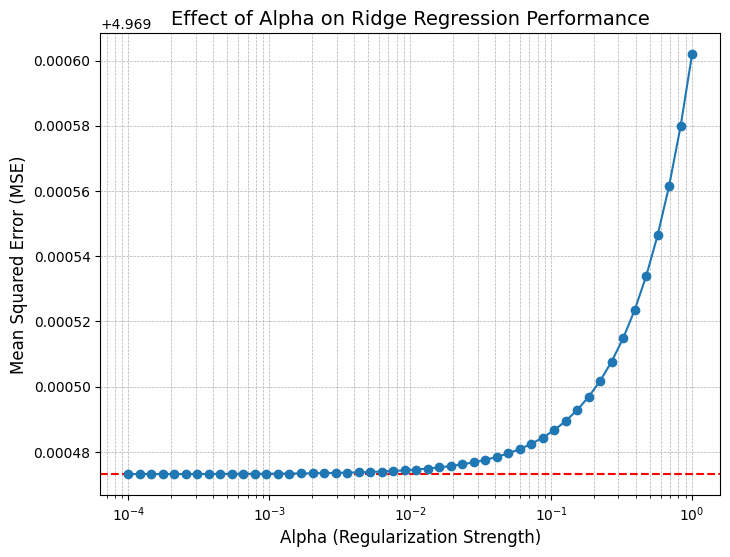

Alpha with minimum MSE: 0.0001


In [ ]:
# Define a range of alpha values to test
alpha_values = np.logspace(-4, 0, 50)  # 50 values between 10^-4 and 10^2
mse_values = []

scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_val_normalized = scaler.transform(x_val)
# Loop through each alpha value, perform Ridge Regression, and calculate MSE
for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(x_train_normalized, y_train)
    y_pred = model.predict(x_val_normalized)
    mse = mean_squared_error(y_val, y_pred)
    mse_values.append(mse)

# Plot alpha values vs. MSE
plt.figure(figsize=(8, 6))
plt.axhline(4.969473150288048, color='red', linestyle='--', linewidth=1.5, label='Target MSE')
plt.plot(alpha_values, mse_values, marker='o', linestyle='-')
plt.xscale('log')  # Use log scale for alpha
plt.xlabel('Alpha (Regularization Strength)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('Effect of Alpha on Ridge Regression Performance', fontsize=14)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

print(f"Alpha with minimum MSE: {alpha_values[np.argmin(mse_values)]}")

# Evaluation Metrics
Evaluate our model on the Test set and then plot the actual vs predicted scores

In [ ]:
# Create and train a linear regression model for L2 Loss
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)
model = LinearRegression()
model.fit(x_train_normalized, y_train)
y_pred = model.predict(x_test_normalized)
# Calculate metrics on test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
corr = np.corrcoef(y_test, y_pred)[0, 1]
mae = mean_absolute_error(y_test, y_pred)
rMSE = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rMSE}")
print(f"R-squared: {r2}")
print(f"Correlation: {corr}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 3.040782000766167
Root Mean Squared Error: 1.7437838170960775
R-squared: 0.7542948881539702
Correlation: 0.8690129416472172
Mean Absolute Error: 0.8833794580784919


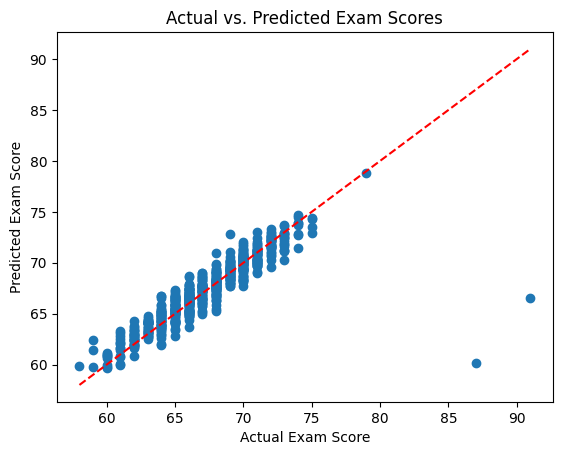

In [ ]:
# Visualize the model with a scatterplot

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs. Predicted Exam Scores")
plt.show()

# Final Model & Conclusion
Show the coefficients multiplied by each feature to create the closed form that can be used for predicting test scores.

The model used above on the test set is on our normalized data, meaning we can now use the coefficient magnitude to analyze feature importance. A sorted list of ecah feature and its coefficient is described below.

In [ ]:
coefficients = model.coef_

# Create a DataFrame with feature names and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
})

# Sort by absolute coefficient values (optional, for easier viewing of important features)
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the coefficients and feature names
print(coeff_df[['Feature', 'Coefficient']])
print("Intercept: ", model.intercept_)

                 Feature  Coefficient
1             Attendance     2.284973
0          Hours_Studied     1.759526
3   Parental_Involvement     0.696758
2        Previous_Scores     0.695144
5    Access_to_Resources     0.683066
7      Tutoring_Sessions     0.607287
6     Distance_from_Home    -0.331265
4  Learning_Disabilities    -0.239832
Intercept:  67.23241590214067
